## CAMB-iDEDM Demo
In this notebook, I show briefly how to use the CAMB-iDEDM Python interface

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders. Delete these two lines for pip/conda install.
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.3.8 installed at /home/user/cosmo/CAMB-iDEDM/camb


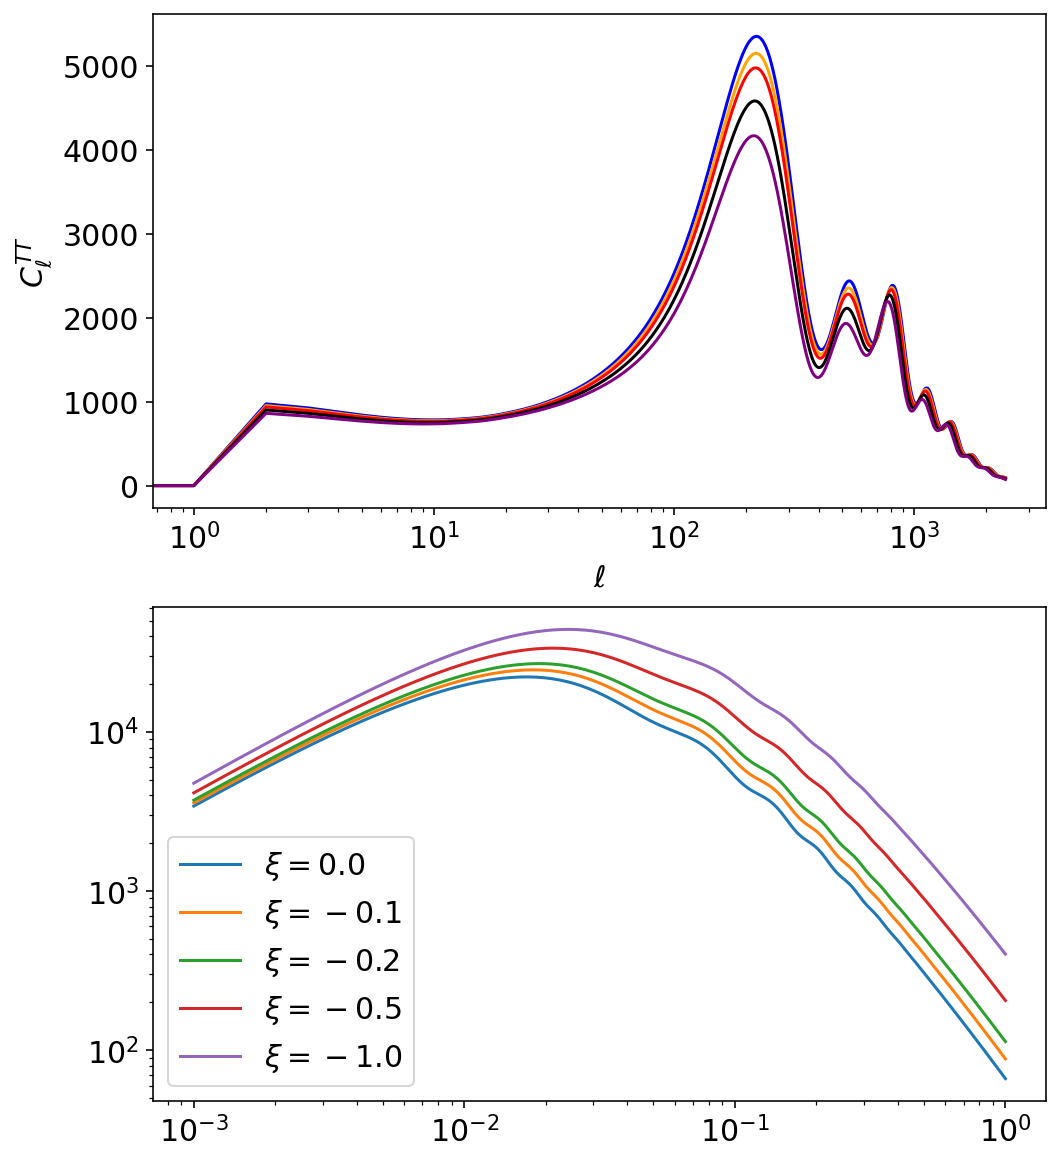

In [17]:
colors = ['blue', 'orange', 'red', 'black', 'purple']
xis = [0, -0.1, -0.2, -0.5, -1]

plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 1, figsize=(8,10))
for xi, color in zip(xis, colors):
    pars = camb.CAMBparams()
    pars.set_cosmology(thetastar=0.0104, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
    pars.DarkEnergy.set_params(xi_interaction=xi, w=-0.999)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    results = camb.get_results(pars)

    cmb_spectra = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    ks, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
    c_ells = cmb_spectra['total']
    ells = np.arange(c_ells.shape[0])
    axs[0].semilogx(ells, c_ells[:,0], color=color)
    axs[1].loglog(ks, pk[0])

plt.legend([r'$\xi = {:.1f}$'.format(xi) for xi in xis])
axs[0].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$C^{TT}_\ell$')
plt.savefig("iDEDM_Power_Spectra.pdf")